## TASK 2 (Heart Disease Prediction)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# 1. DATA LOADING AND INITIAL EXPLORATION

print("="*60)
print("HEART DISEASE PREDICTION MODEL")
print("="*60)

# Load the dataset
df = pd.read_csv(r'D:\Downloads\INTERNSHIP\Heart-Disease-Prediction\heart.csv')

print("\n✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display first few rows
print("\n📊 First 5 rows of the dataset:")
print(df.head())

# Check basic info about the dataset
print("\n📋 Dataset Information:")
print(df.info())

# Statistical summary
print("\n📈 Statistical Summary:")
print(df.describe())

HEART DISEASE PREDICTION MODEL

✅ Dataset loaded successfully!
Dataset shape: (1025, 14)
Number of samples: 1025
Number of features: 14

📊 First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0  

In [3]:
# 2. DATA CLEANING AND HANDLING MISSING VALUES

print("\n" + "="*60)
print("DATA CLEANING")
print("="*60)

# Check for missing values
print("\n Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found!")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")

# Check for any infinite values
print("\n🔢 Checking for infinite values:")
inf_values = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Infinite values found: {inf_values}")

# Check column names and rename if needed for clarity
print("\n📝 Column names:")
print(df.columns.tolist())

# If there are missing values, handle them
if df.isnull().sum().sum() > 0:
    print("\n Handling missing values:")
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  - Filled missing values in '{col}' with median: {median_val}")
    
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"  - Filled missing values in '{col}' with mode: {mode_val}")

print("\n✅ Data cleaning completed!")



DATA CLEANING

 Checking for missing values:
No missing values found!

 Number of duplicate rows: 723
✅ Removed 723 duplicate rows

🔢 Checking for infinite values:
Infinite values found: 0

📝 Column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

✅ Data cleaning completed!



EXPLORATORY DATA ANALYSIS

 Target Variable Distribution:
Using 'target' as target variable
target
1    164
0    138
Name: count, dtype: int64
Percentage of patients with heart disease: 54.30%
Percentage of patients without heart disease: 45.70%


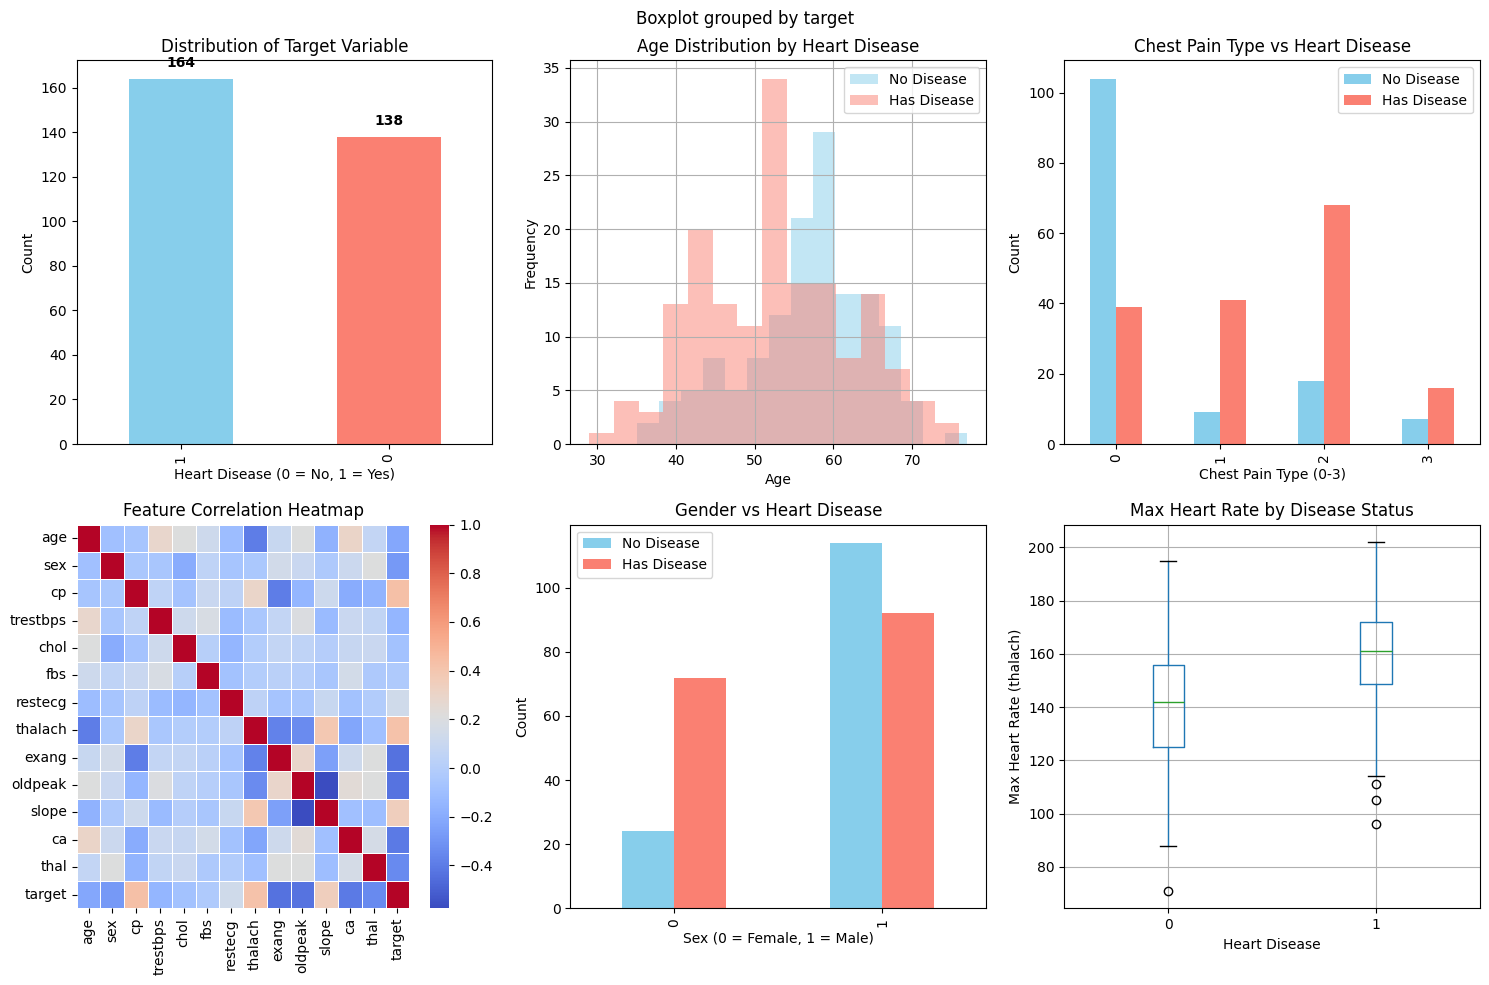

In [4]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Target variable distribution
print("\n Target Variable Distribution:")
target_col = 'target' if 'target' in df.columns else 'num' if 'num' in df.columns else df.columns[-1]
print(f"Using '{target_col}' as target variable")

target_counts = df[target_col].value_counts()
print(target_counts)
print(f"Percentage of patients with heart disease: {target_counts[1]/len(df)*100:.2f}%")
print(f"Percentage of patients without heart disease: {target_counts[0]/len(df)*100:.2f}%")

# Visualize target distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis - Heart Disease Dataset', fontsize=16)

# 1. Target distribution
ax1 = axes[0, 0]
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribution of Target Variable')
ax1.set_xlabel('Heart Disease (0 = No, 1 = Yes)')
ax1.set_ylabel('Count')
for i, v in enumerate(target_counts):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Age distribution by target
ax2 = axes[0, 1]
df[df[target_col] == 0]['age'].hist(alpha=0.5, label='No Disease', bins=15, ax=ax2, color='skyblue')
df[df[target_col] == 1]['age'].hist(alpha=0.5, label='Has Disease', bins=15, ax=ax2, color='salmon')
ax2.set_title('Age Distribution by Heart Disease')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Chest pain type distribution
ax3 = axes[0, 2]
if 'cp' in df.columns:
    cp_disease = pd.crosstab(df['cp'], df[target_col])
    cp_disease.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'])
    ax3.set_title('Chest Pain Type vs Heart Disease')
    ax3.set_xlabel('Chest Pain Type (0-3)')
    ax3.set_ylabel('Count')
    ax3.legend(['No Disease', 'Has Disease'])

# 4. Correlation heatmap
ax4 = axes[1, 0]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax4, linewidths=0.5)
ax4.set_title('Feature Correlation Heatmap')

# 5. Gender analysis
ax5 = axes[1, 1]
if 'sex' in df.columns:
    gender_disease = pd.crosstab(df['sex'], df[target_col])
    gender_disease.plot(kind='bar', ax=ax5, color=['skyblue', 'salmon'])
    ax5.set_title('Gender vs Heart Disease')
    ax5.set_xlabel('Sex (0 = Female, 1 = Male)')
    ax5.set_ylabel('Count')
    ax5.legend(['No Disease', 'Has Disease'])

# 6. Thalach (max heart rate) distribution
ax6 = axes[1, 2]
if 'thalach' in df.columns:
    df.boxplot(column='thalach', by=target_col, ax=ax6)
    ax6.set_title('Max Heart Rate by Disease Status')
    ax6.set_xlabel('Heart Disease')
    ax6.set_ylabel('Max Heart Rate (thalach)')

plt.tight_layout()
plt.show()


In [ ]:
# 4. DATA PREPROCESSING FOR MODELING

print("\n" + "="*60)
print("DATA PREPROCESSING FOR MODELING")
print("="*60)

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Check for categorical variables that need encoding
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"\nCategorical columns found: {list(categorical_columns)}")

# Encode categorical variables if any
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])
    print(f"✅ Encoded '{col}'")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📊 Data split complete:")
print(f"  - Training set size: {X_train.shape}")
print(f"  - Testing set size: {X_test.shape}")
print(f"  - Training set target distribution:\n{y_train.value_counts()}")
print(f"  - Testing set target distribution:\n{y_test.value_counts()}")

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n✅ Features have been standardized (mean=0, std=1)")